# Day 08. Exercise 04
# Regression

## 0. Imports

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [23]:
df = pd.read_csv('../data/checker_regression.csv').fillna(0)
df = df.groupby('uid').mean()
df.head()

,num_commits,pageviews,AVG(diff)
uid,,,
user_1,62.0,28.0,0.0
user_10,20.0,89.0,0.0
user_11,7.0,0.0,-2.0
user_12,86.0,0.0,-89.0
user_13,52.0,0.0,-48.5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     float64
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(3)
memory usage: 928.0+ bytes


In [61]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [31]:
# for val in X_train.value_counts().values:
#     print(val, end=',')
# print('\n', X_train.columns.values)
# for val in X_test.value_counts().values:
#     print(val, end=',')
# print('\n', X_test.columns.values)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [119]:
def crossval(Model, X, y, n_splits: int = 10):
    all_rmse = []
    kf = KFold(n_splits=n_splits, random_state=21, shuffle=True)
    for train, test in kf.split(X, y):
        clf = Model.fit(X.iloc[train], y.iloc[train])
        y_train_pred = clf.predict(X.iloc[train])
        y_test_pred = clf.predict(X.iloc[test])
        rmse_train = mean_squared_error(y.iloc[train], y_train_pred, squared=False)
        rmse_test = mean_squared_error(y.iloc[test], y_test_pred, squared=False)
        all_rmse.extend([rmse_train, rmse_test])
        print(f'train - {rmse_train}',
              f'test - {rmse_test}', sep=' \t|\t')
    print(f'Average RMSE on crossval is {sum(all_rmse) / len(all_rmse)}')

In [75]:
crossval(LinearRegression(fit_intercept=False), X, y)

train - 72.76993808124652 	|	test - 66.00102615432043
train - 73.572177516143 	|	test - 56.93999619800116
train - 73.52150368295793 	|	test - 90.18607089188914
train - 70.19624500873643 	|	test - 85.93184687246872
train - 70.54577537835485 	|	test - 84.88509144095887
train - 69.82808185925116 	|	test - 89.03413627284623
train - 70.87449516505839 	|	test - 93.48456884028366
train - 75.3982124140226 	|	test - 28.363733796909678
train - 66.27560430106935 	|	test - 110.26820392379167
train - 73.04567124286432 	|	test - 55.394757132860974
Average RMSE on crossval is 73.82585680870173


In [110]:
# criterion doesn't change anything
# incresing max_depth decreases RMSE (good)
crossval(DecisionTreeRegressor(criterion='squared_error', random_state=21, max_depth=5), X, y)

train - 19.51853504928291 	|	test - 120.62116123233534
train - 13.810879405644846 	|	test - 79.5333147061541
train - 24.668873948365416 	|	test - 0.0
train - 24.61110834249758 	|	test - 78.98656472722058
train - 7.999221716949911 	|	test - 96.70180443756715
train - 15.988261168504463 	|	test - 53.91636704579294
train - 24.668873948365416 	|	test - 0.0
train - 20.545808925984808 	|	test - 56.383024650598514
train - 23.16474904441225 	|	test - 114.38661254547942
train - 22.13969671838106 	|	test - 40.58792924010783
Average RMSE on crossval is 41.91163934268223


In [95]:
# increasing n_estimators, max_depth gives nothing
crossval(RandomForestRegressor(random_state=21, n_estimators=100, max_depth=25), X, y)

train - 20.920695939881494 	|	test - 97.50335139862099
train - 22.513709875327706 	|	test - 78.01690371916807
train - 26.45753874793136 	|	test - 20.678674351271315
train - 24.801579078915356 	|	test - 56.688591592495406
train - 22.400454654459477 	|	test - 77.74492463343996
train - 23.84950304426348 	|	test - 53.93331786876579
train - 24.960042347292447 	|	test - 8.141221739804578
train - 24.33125738694806 	|	test - 57.41679402832187
train - 21.748562307626617 	|	test - 91.24344940546369
train - 26.400345641306533 	|	test - 32.155805517822095
Average RMSE on crossval is 40.59533616395631


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

---
### LinearRegression

In [107]:
clf_linreg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
linreg_pred = clf_linreg.predict(X_test)
linreg_pred

array([-2.96421289e+01, -4.19930160e+01,  2.19522022e-02, -3.78760536e+01,
       -2.37320909e+01, -3.37590913e+01])

In [111]:
clf_tree = DecisionTreeRegressor(criterion='squared_error', random_state=21, max_depth=5).fit(X_train, y_train)
tree_pred = clf_tree.predict(X_test)
tree_pred

array([-223.6,  -48.5,    0. , -175.6,    0. , -175.6])

In [112]:
clf_forest = RandomForestRegressor(random_state=21, n_estimators=100, max_depth=25).fit(X_train, y_train)
forest_pred = clf_forest.predict(X_test)
forest_pred

array([-1.86402667e+02, -6.54900000e+01, -1.75000000e-01, -1.38915000e+02,
        0.00000000e+00, -1.66714333e+02])

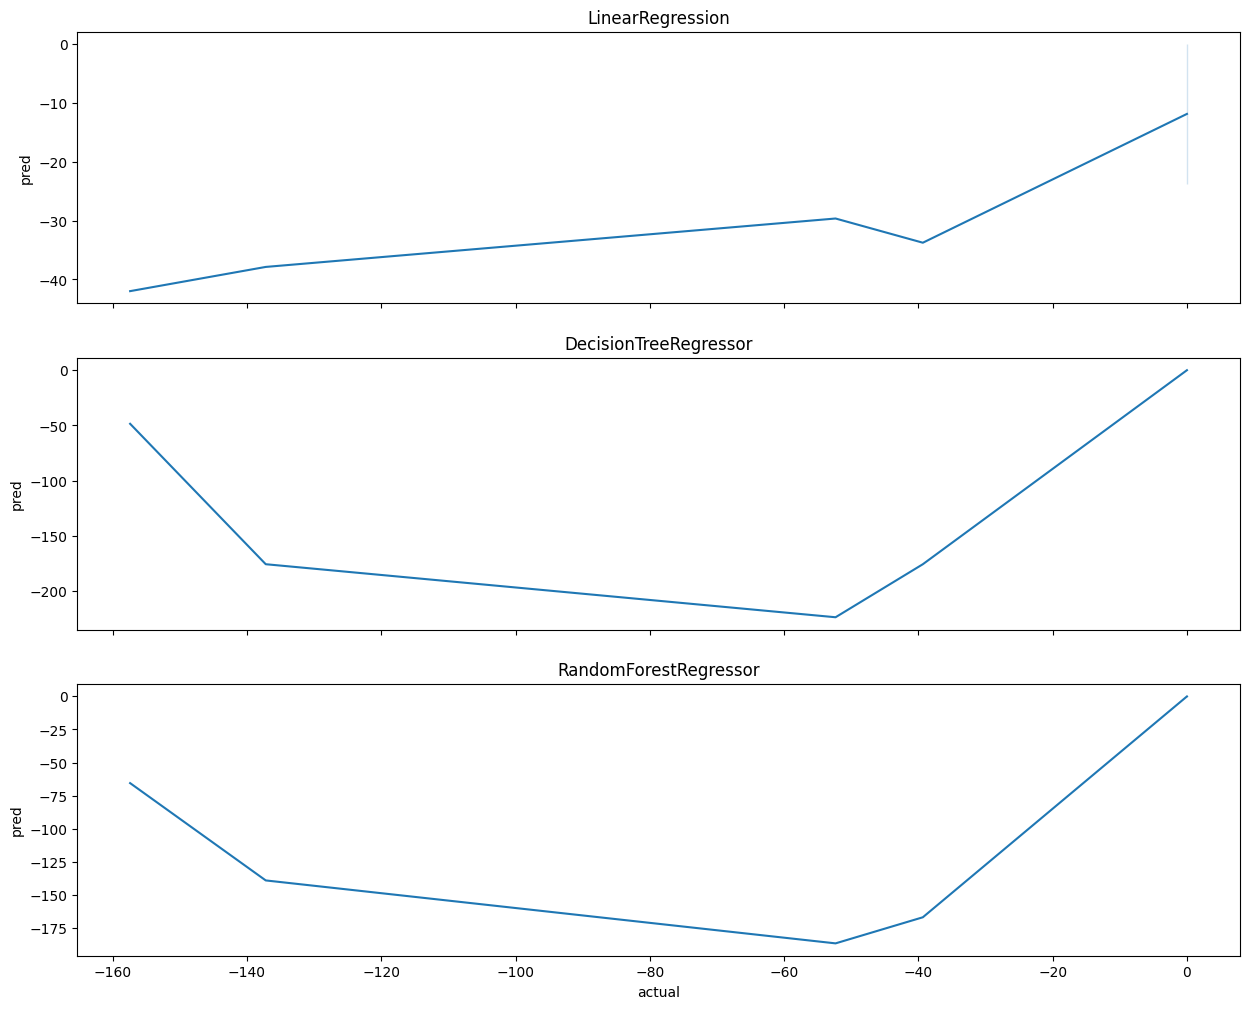

In [117]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 12), sharex=True)

plt_linreg = sns.lineplot({'pred': linreg_pred, 'actual': y_test}, x='actual', y='pred', ax=ax1)
plt_tree = sns.lineplot({'pred': tree_pred, 'actual': y_test}, x='actual', y='pred', ax=ax2)
plt_forest = sns.lineplot({'pred': forest_pred, 'actual': y_test}, x='actual', y='pred', ax=ax3)

plt_linreg.set_title('LinearRegression')
plt_tree.set_title('DecisionTreeRegressor')
plt_forest.set_title('RandomForestRegressor')

plt.show()

In the ideal case plot should have straight line from 0 to other corner (diagonal)